✅ تم تحميل البيانات: (1000, 7)
🚫 لم يتم العثور على عمود هدف باسم 'target' أو 'label' أو 'y'
🧠 الأعمدة المتاحة: ['id', 'species', 'color', 'petal_length_cm', 'petal_width_cm', 'freshness_days', 'is_fragrant']
📌 سيتم استخدام العمود 'species' كهدف محتمل (n_unique <= 10)
📌 نوع المسألة: تصنيف (Classification)
✅ الدقة (Accuracy): 0.5650

🔎 تقرير التصنيف:
              precision    recall  f1-score   support

        Lily       0.68      0.82      0.74        39
      Orchid       0.44      0.42      0.43        33
        Rose       0.47      0.42      0.45        40
   Sunflower       0.68      0.53      0.59        51
       Tulip       0.51      0.62      0.56        37

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.57      0.56      0.56       200



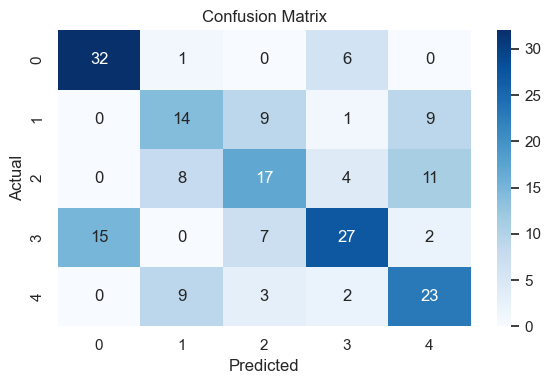

In [2]:
# ===============================
# 🤖 04 - Model Experiments
# ===============================

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_absolute_error, r2_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

# =====================
# 📥 تحميل البيانات
# =====================

def load_clean_data():
    data_path = os.path.join("..", "data", "processed", "clean_data.csv")
    df = pd.read_csv(data_path)
    print(f"✅ تم تحميل البيانات: {df.shape}")
    return df


# ==============================
# 🎯 تحديد عمود الهدف تلقائيًا أو يدوياً
# ==============================

def detect_target_column(df):
    for col in df.columns:
        if col.lower() in ['target', 'label', 'y']:
            print(f"🎯 تم اكتشاف العمود الهدف تلقائيًا: {col}")
            return col
    
    print("🚫 لم يتم العثور على عمود هدف باسم 'target' أو 'label' أو 'y'")
    print("🧠 الأعمدة المتاحة:", list(df.columns))

    # محاولة تلقائية ثانية: إيجاد عمود ثنائي أو فيه عدد قليل من القيم
    for col in df.columns:
        if df[col].nunique() <= 10 and df[col].dtype in ['int64', 'object']:
            print(f"📌 سيتم استخدام العمود '{col}' كهدف محتمل (n_unique <= 10)")
            return col

    # طلب يدوي من المستخدم
    target_col = input("📝 أدخل اسم العمود الهدف يدويًا: ").strip()
    if target_col not in df.columns:
        raise ValueError(f"🚨 العمود '{target_col}' غير موجود في البيانات.")
    return target_col


# =============================
# ✂️ تقسيم البيانات للتدريب
# =============================

def split_data(df, target_col):
    X = df.drop(columns=[target_col]).select_dtypes(include=["float64", "int64"]).fillna(0)
    y = df[target_col]

    if X.shape[1] == 0:
        raise ValueError("🚫 لا توجد سمات رقمية قابلة للنمذجة.")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, y


# =======================================
# 🧪 تدريب النموذج وتقييم الأداء تلقائيًا
# =======================================

def run_model_experiment(X_train, X_test, y_train, y_test, y_full):
    if y_full.nunique() <= 10:
        print("📌 نوع المسألة: تصنيف (Classification)")
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        print(f"✅ الدقة (Accuracy): {acc:.4f}\n")
        print("🔎 تقرير التصنيف:")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.savefig("confusion_matrix.png")
        plt.show()

    else:
        print("📌 نوع المسألة: انحدار (Regression)")
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"✅ MAE: {mae:.4f}")
        print(f"✅ R²: {r2:.4f}")

        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_test, y=y_pred, color='darkorange')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs Predicted')
        plt.tight_layout()
        plt.savefig("regression_results.png")
        plt.show()


# ========================
# 🚀 نقطة تشغيل السكربت
# ========================

if __name__ == "__main__":
    df = load_clean_data()
    target_col = detect_target_column(df)
    X_train, X_test, y_train, y_test, y_full = split_data(df, target_col)
    run_model_experiment(X_train, X_test, y_train, y_test, y_full)
